# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Your code here. 
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

In [3]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

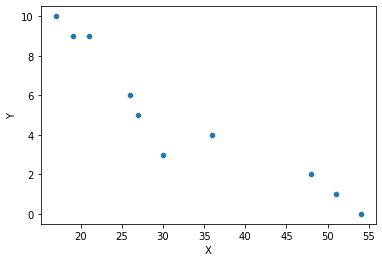

In [4]:
# Your code here.
sns.scatterplot(data=student_data, x="X", y="Y");

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
""" 
Based on this data, it indeed seems the case that the older students get, the less often they are late: a more or less linear downward trend.

"""

' \nBased on this data, it indeed seems the case that the older students get, the less often they are late: a more or less linear downward trend.\n\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
"""
correlation: says something about to what extent two variables move together in a linear fashion. It tells you something about the strength and direction of this 'moving together' (no causation, and note they can also 'move together' while moving in opposite directions).
covariance: says something about in what direction the two variables move together (in a linear fashion): postive / negative relationship. It does not tell you anything about the strength of the 'moving together'.
"""
correl = student_data.corr()["X"]
covar = student_data.cov()["X"]

print("correlation:\n", correl, '\n\ncovariance:\n', covar)


correlation:
 X    1.000000
Y   -0.939163
Name: X, dtype: float64 

covariance:
 X    187.655556
Y    -45.566667
Name: X, dtype: float64


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
X = student_data["X"] 
Y = student_data["Y"] #dependent variable

#univariate linear regression: there is only 1 variable on which the prediction is made.

slope, intercept, r_value, p_value, std_error = stats.linregress(X, Y)
print(f'The model based on this data would be:\n Y = {round(intercept,3)} + {round(slope,3)} * X')


The model based on this data would be:
 Y = 12.889 + -0.243 * X


Plot your regression model on your scatter plot.

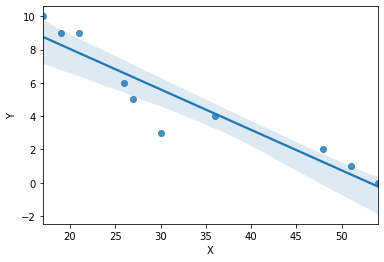

In [8]:
# Your code here.
sns.regplot(x=X, y=Y, data=student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [22]:
# Your response here. 
print(f'The correlation of the two variables is high ({round(r_value,2)}) and the p-value ({round(p_value,5)}) is smaller than 0.025. This p-value indicates that the slope is significantly different from zero and therefore we have to dismiss the hypothesis (H0) that X and Y are not correlated (slope 0).')

The correlation of the two variables is high (0.19) and the p-value (0.68263) is smaller than 0.025. This p-value indicates that the slope is significantly different from zero and therefore we have to dismiss the hypothesis (H0) that X and Y are not correlated (slope 0).


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need 
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [11]:
# Import the data
vehicles = pd.read_csv('../data/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
# Your response here. 
my_vehicles = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year",'CO2 Emission Grams/Mile']]
my_vehicles.head()
print(my_vehicles.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=True))

"""
Fuel Barrel/Year, Fuel Cost/Year and Combined MPG have the strongest correlations with CO2 emissions. 

Cost/Year is a result of the high usage though, so I would not be inclined to put this variable into the model. So even though year is least correlated with CO2 emission, I think it might still be more informative than adding Fuel cost/year (assuming barrels/year is put in the model).Therefore cost/year would be at the bottom of my list of 'most helpful information'.
Fuel Barrel/Year has the strongest correlation. The next variable I'd put in would be combined MPG.

"""

Combined MPG              -0.926229
Year                      -0.222300
Cylinders                  0.752393
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


"\nFuel Barrel/Year, Fuel Cost/Year and Combined MPG have the strongest correlations with CO2 emissions. \n\nCost/Year is a result of the high usage though, so I would not be inclined to put this variable into the model. So even though year is least correlated with CO2 emission, I think it might still be more informative than adding Fuel cost/year (assuming barrels/year is put in the model).Therefore cost/year would be at the bottom of my list of 'most helpful information'.\nFuel Barrel/Year has the strongest correlation. The next variable I'd put in would be combined MPG.\n\n"

In [23]:
my_vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here. 

X=my_vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
Y=my_vehicles["CO2 Emission Grams/Mile"]

X=sm.add_constant(X) # add constant (beta-0) to the model
model=sm.OLS(Y, X) #choose linear regression model based on ordinary least squares
results = model.fit() #fit a line through the model
predictions = results.predict(X)

print(f'The model explains more or less {round((r2_score(Y, predictions)*100),2)}% of the variation of Y')

"""
Use multivariate linear regression as you add several independent variables (X) based on which values you try to predict Y (CO2 emissions).
"""

The model explains more or less 98.09% of the variation of Y


'\nUse multivariate linear regression as you add several independent variables (X) based on which values you try to predict Y (CO2 emissions).\n'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [14]:
# Your response here. 
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                             12:48:00   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

The strongest relationship by far is Fuel Barrels/Year (coef = 19.1), followed by Combined MPG (-3.0) and Cylinders (1.9), because these variables have the highest absolute coefficients.<br>

Observations:
    <ol>
        <li>All variables have a P-value smaller than 0.025, meaning the coefficient of all these variables with CO2 emissions are all significantly different from 0.</li>
    <li>The directions of the coefficients make sense (newer cars, fewer CO2 emissions; lower combined MPG higher CO2 emissions etc)</li>
        <li>The fit of the model (adjusted R2) is pretty high, meaning the variables together explain a lot of variation in CO2 emissions.</li>
    </ol>
Based on these three observations I have confidence in the model.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [15]:
# Your code here. 

# it doesnt really make sense to take 'number of people that showed/didn't show as Y variable, 
# as this is obviously correlated with people you invited (if you invite 1 person, max 1 person cannot show up)
# therefore I choose to look at the percentage of people that doesn't show up. Not perfect either, but seems to make more sense to me.

invitations = [1,3,4,6,8,9,11,14]
shows = [1,2,4,4,5,7,8,13]

data = pd.DataFrame({'X':invitations, 'shows':shows})
data["Y"]=data["shows"]/data["X"]

data

,X,shows,Y
0,1,1,1.000000
1,3,2,0.666667
2,4,4,1.000000
3,6,4,0.666667
4,8,5,0.625000
5,9,7,0.777778
6,11,8,0.727273
7,14,13,0.928571


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

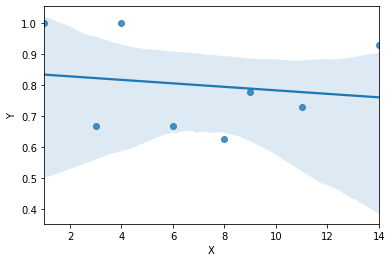

In [16]:
# Your code here.
sns.regplot(x="X", y="Y", data=data);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [17]:
# Your response here. 
"""
Based on the graph, there does not seem to be a very convincing relationship between the number of people invited and the percentage of people that show up.
"""

'\nBased on the graph, there does not seem to be a very convincing relationship between the number of people invited and the percentage of people that show up.\n'

In [18]:
X = data["X"]
Y = data["Y"]

slope, intercept, r_value, p_value, std_error = stats.linregress(X, Y)
print(p_value)
""" 
based on the p_value there is no significant linear relationship.
""" 

0.709185186998788


' \nbased on the p_value there is no significant linear relationship.\n'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [19]:
# Your response here. 
"There might be a problem with the invitation of 1 person: if this person can't come, there won't be a party, is this recorded aswell? Otherwise the parties with 1 invitation will by definition be 100%, which is problematic. Though I do not believe this will all of a sudden result in a linear relationship, but here we go"

"There might be a problem with the invitation of 1 person: if this person can't come, there won't be a party, is this recorded aswell? Otherwise the parties with 1 invitation will by definition be 100%, which is problematic. Though I do not believe this will all of a sudden result in a linear relationship, but here we go"

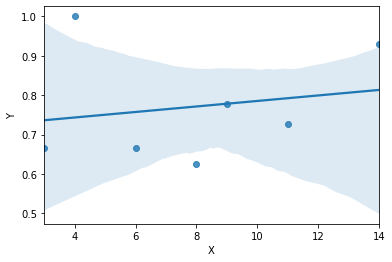

In [20]:
invitations = [3,4,6,8,9,11,14]
shows = [2,4,4,5,7,8,13]

data_2 = pd.DataFrame({'X':invitations, 'shows':shows})
data_2["Y"]=data_2["shows"]/data_2["X"]

sns.regplot(x="X", y="Y", data=data_2);

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [21]:
# Your response here. 
X_2 = data_2["X"]
Y_2 = data_2["Y"]

slope, intercept, r_value, p_value, std_error = stats.linregress(X_2, Y_2)
print(p_value)
""" 
Based on this new p_value there is still no significant linear relationship.
""" 

0.6826317250518037


' \nBased on this new p_value there is still no significant linear relationship.\n'